### **Imports and drive mount**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from numpy.linalg import inv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Gradient Descent with 4k+ data**

In [21]:
data = pd.read_csv('/content/drive/MyDrive/Dummy-Dataset/4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [22]:
data.drop(['Posted On','Floor','Area Locality','City','Tenant Preferred','Point of Contact'],axis='columns',inplace=True)
data

,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Unfurnished,2
1,2,20000,800,Super Area,Semi-Furnished,1
2,2,17000,1000,Super Area,Semi-Furnished,1
3,2,10000,800,Super Area,Unfurnished,1
4,2,7500,850,Carpet Area,Unfurnished,1
...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Semi-Furnished,2
4742,3,29000,2000,Super Area,Semi-Furnished,3
4743,3,35000,1750,Carpet Area,Semi-Furnished,3
4744,3,45000,1500,Carpet Area,Semi-Furnished,2


In [23]:
data['Area Type'].replace({'Built Area': 0, 'Carpet Area' : 1, 'Super Area' : 2},inplace=True)
data['Furnishing Status'].replace({'Unfurnished' : 0,'Semi-Furnished' : 1, 'Furnished': 2},inplace=True)

**Scaling for some parameters**

In [24]:
scaler = preprocessing.MinMaxScaler()
column_to_scale = ['Size']
data[column_to_scale] = scaler.fit_transform(data[column_to_scale])

total_column = len(data)
x = data.drop('Rent',axis='columns')
y = data['Rent']
x = np.hstack((np.ones((total_column,1)), x))

In [25]:
theta = np.zeros(6)
thetas = []
epoch = 30000;
alpha = 0.1;
cost = 0
costs = []

for i in range(epoch):
  predicted_rent = x.dot(theta)
  errors = np.subtract(predicted_rent, y)
  theta = theta - ((alpha/total_column) * x.T.dot(errors))
  thetas.append(theta)
  cost = 1 / (2*total_column) * np.sum(np.square(errors))
  costs.append(cost)

print('Thetas = ',theta)
print('Cost = ',cost)

Thetas =  [  -839.64975641  -2303.84810102 209366.41118617 -23386.99361181
   6427.37114078  23442.2934393 ]
Cost =  2328402258.368509


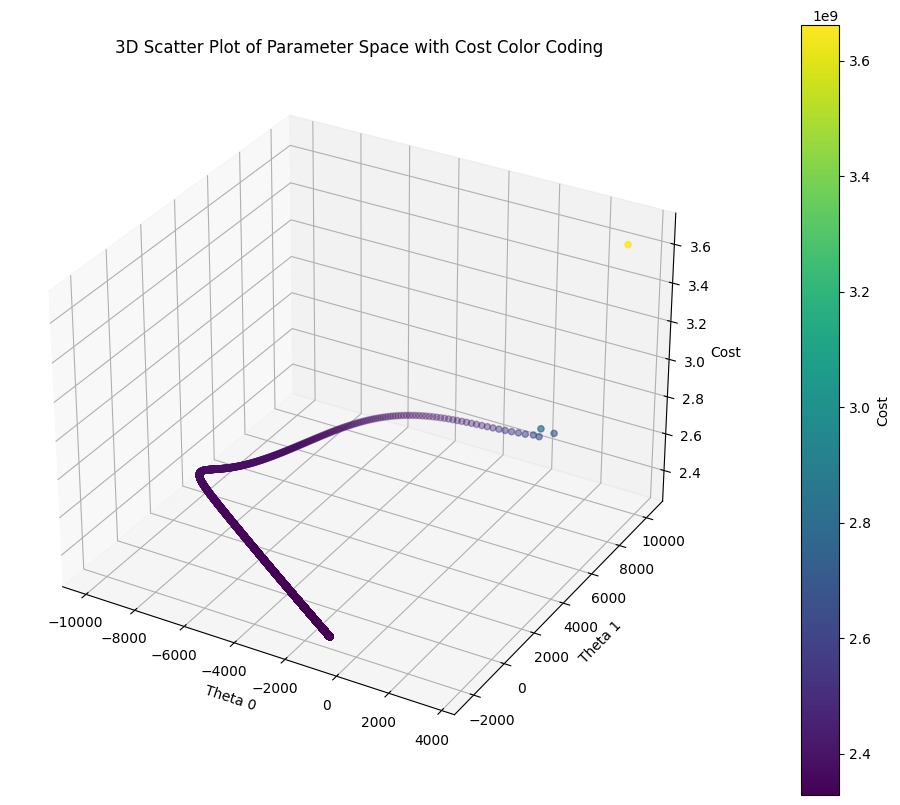

In [26]:
from mpl_toolkits.mplot3d import Axes3D

thetas = np.array(thetas)
costs = np.array(costs)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter_plot = ax.scatter(thetas[:, 0], thetas[:, 1], costs, c=costs, cmap='viridis', marker='o')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('3D Scatter Plot of Parameter Space with Cost Color Coding')

cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
cbar.set_label('Cost')

plt.show()

**TriContour Plot**

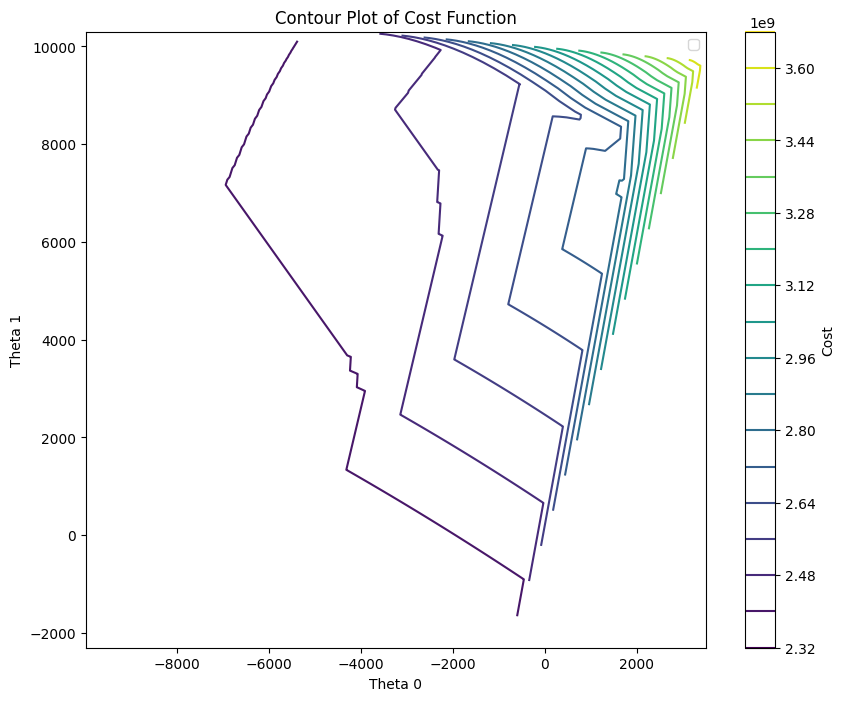

In [30]:
from matplotlib.tri import Triangulation

min_cost_index = np.argmin(costs)

triang = Triangulation(thetas[:, 0], thetas[:, 1])

plt.figure(figsize=(10, 8))
contour_plot = plt.tricontour(triang, costs, levels=20, cmap='viridis')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Contour Plot of Cost Function')
plt.legend()
plt.colorbar(contour_plot, label='Cost')

plt.show()

## **Normal Equation (using the Dataset used in 1st section : Univariate Linear Regression:)**

In [28]:
x_transpose_dot_x = np.matmul(x.T, x)
x_transpose_dot_y = np.matmul(x.T,y)

inverse_x_transpose_dot_x = inv(x_transpose_dot_x)
inverse_x_transpose_dot_x

theta_normal_equation = np.matmul(inverse_x_transpose_dot_x, x_transpose_dot_y)

predicted_rent = x.dot(theta_normal_equation)
errors = np.subtract(predicted_rent, y)
cost_normal_equation = 1 / (2*total_column) * np.sum(np.square(errors))

print('Thetas = ',theta_normal_equation)
print('Cost = ',cost_normal_equation)


Thetas =  [  -833.81586631  -2307.49253894 209475.1262127  -23388.1777726
   6426.81663365  23437.69656532]
Cost =  2328402243.394083
